# 7. Monte Carlo Methods

In [116]:
%config InlineBackend.figure_format = 'svg'
from IPython.display import HTML
from helper_functions import *
import matplotlib.pyplot as plt
import numpy as np
import helper_functions as h
from scipy import stats
display(HTML("""
<style>
div.text_cell_render {
font-family: "Georgia", serif;
font-size: 15px;
}
</style>
"""))

## Example: approximating $\pi$

In [117]:
no_samples = 10000

samples = np.random.rand(no_samples, 2)
radii = np.sum(samples**2, axis = 1)**0.5
keeps = np.where(radii < 1)[0]

pi_approx = 4*len(keeps)/no_samples
print(pi_approx)

3.1492


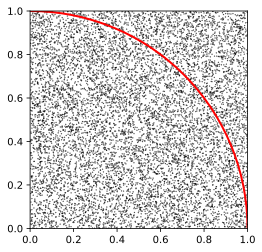

In [118]:
plt.scatter(samples[:, 0], samples[:, 1], s = 0.1, color = 'black')
ax = plt.gca()
ax.add_artist(plt.Circle((0, 0), 1, color = 'red', fill = False, linewidth = 2))
plt.xlim([0, 1]), plt.ylim([0, 1])
ax.set_aspect('equal')
plt.show()

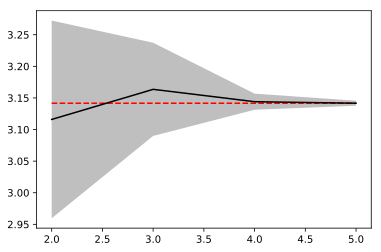

In [119]:
sample_sizes = np.array([10**2, 10**3, 10**4, 10**5])
trials_per_size = 10

mean_pies = []
sig_pies = []
for no_samples in sample_sizes:
    
    pies = []
    for n in range(trials_per_size):
        
        samps = np.random.rand(no_samples, 2)
        keeps = np.where(np.sum(samps**2, axis = 1)**0.5 < 1)[0]
        
        pies.append(4*len(keeps)/no_samples)
        
    mean_pies.append(np.array(pies).mean())
    sig_pies.append(np.array(pies).var()**0.5)
    
mean_pies = np.array(mean_pies)
sig_pies = np.array(sig_pies)
  
plt.plot(np.log10(sample_sizes), np.ones_like(sample_sizes)*np.pi, '--', color = 'red')
plt.plot(np.log10(sample_sizes), mean_pies, color = 'black')
plt.fill_between(np.log10(sample_sizes), mean_pies + sig_pies, mean_pies - sig_pies, facecolor = 'grey', alpha = 0.5)
plt.show()

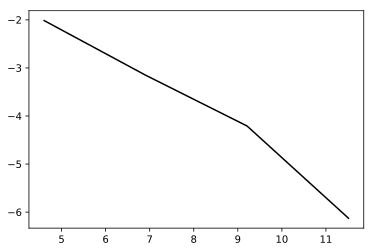

In [120]:
errors = []
sample_sizes = np.array([10**2, 10**3, 10**4, 10**5])
samples_per_size = 10**6

for no_samples in sample_sizes:
    
    no_reps = int(samples_per_size/no_samples)
    mean_error = 0
    for n in range(no_reps):
        
        samps = np.random.rand(no_samples, 2)
        keeps = np.where(np.sum(samps**2, axis = 1)**0.5 < 1)[0]
        
        mean_error += np.abs(np.pi - 4*len(keeps)/no_samples)
    
    errors.append(mean_error/no_reps)

plt.plot(np.log(sample_sizes), np.log(errors), color = 'black')
plt.show()

In [121]:
slope = stats.linregress(np.log(sample_sizes), np.log(errors))[0]
slope

-0.5816601772808605

## Example: approximating intractable integral

\begin{align}
I = \int e^{-(\frac{1}{10}x^4 - \frac{1}{10}x^3 - \frac{1}{2}x^2)} dx
\end{align}

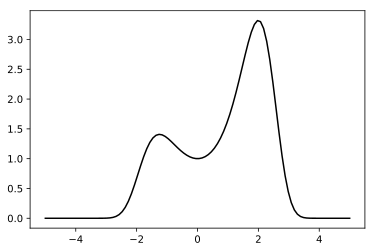

In [122]:
x = np.linspace(-5, 5, 100)
y = np.exp(-(0.1*x**4 - 0.1*x**3 - 0.5*x**2))

plt.plot(x, y, color = 'black')
plt.show()

In [123]:
no_samples = 10**4
max_x, min_x, max_y, min_y = 4, -4, 4, 0

samples = np.random.uniform([min_x, min_y], [max_x, max_y], (no_samples, 2))

x_ = samples[:, 0]
y_ = np.exp(-(0.1*x_**4 - 0.1*x_**3 - 0.5*x_**2))
counts = len(np.where(samples[:, 1] <= y_)[0])

area = (max_x - min_x)*(max_y - min_y)
print(counts/no_samples*area)

8.4768


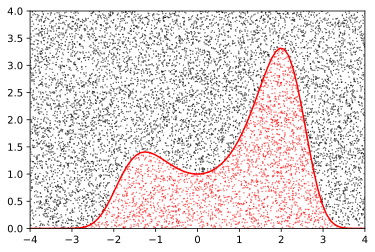

In [124]:
colors = np.array(['black', 'red'])[(samples[:, 1] <= y_)*1]
plt.scatter(samples[:, 0], samples[:, 1], s = 0.1, color = colors)
plt.plot(x, y, color = 'red')
plt.xlim([min_x, max_x]), plt.ylim([min_y, max_y])
plt.show()

In [125]:
approx = []

for n in range(10):
    samples = np.random.uniform([min_x, min_y], [max_x, max_y], (no_samples, 2))

    x_ = samples[:, 0]
    y_ = np.exp(-(0.1*x_**4 - 0.1*x_**3 - 0.5*x_**2))
    approx.append(len(np.where(samples[:, 1] <= y_)[0])/no_samples*area)
    
approx = np.array(approx)
print("Approximate integral: {:.3f}, Error estimate {:.3f}".format(approx.mean(), approx.var()**0.5))

Approximate integral: 8.439, Error estimate 0.139


## Exact sampling

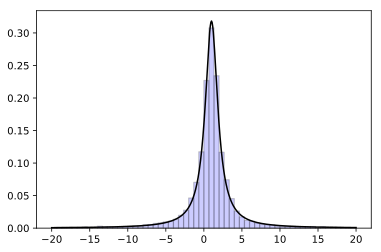

In [126]:
cdf_samples = np.random.rand(10000)
pdf_samples = np.tan(np.pi*cdf_samples - np.pi/2) + mean
pdf_samples = pdf_samples[np.where(abs(pdf_samples) < 20)[0]]
plt.hist(pdf_samples, range = (-20, 20), bins = 60, color = 'blue',
         alpha = 0.2, edgecolor='black', linewidth = 1.2, normed = True)
xs = np.linspace(-20, 20, 500)
plt.plot(xs, (1/np.pi)/(1 + (xs - mean)**2), color = 'black')
plt.show()

## Rejection sampling

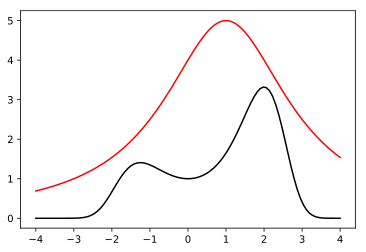

In [143]:
x_ = np.linspace(-4, 4, 100)
y_prob = np.exp(-(0.1*x_**4 - 0.1*x_**3 - 0.5*x_**2))
width = 2
mean = 1
height = 20
y_approx = height/(width**2 + (x_ - mean)**2)

plt.plot(x_, y_prob, 'black')
plt.plot(x_, y_approx, 'red')
plt.show()

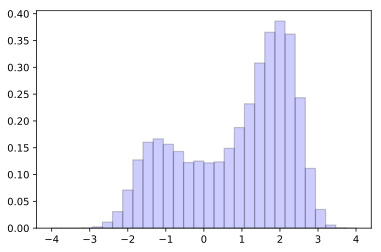

In [141]:
no_samples = 10**5
cdf_samples = np.random.rand(no_samples)
u = np.random.rand(no_samples)
pdf_samples = width*np.tan(np.pi*cdf_samples - np.pi/2) + mean
Mq = height/(width**2 + (pdf_samples - mean)**2)
p = np.exp(-(0.1*pdf_samples**4 - 0.1*pdf_samples**3 - 0.5*pdf_samples**2))
samples_kept = pdf_samples[np.where(Mq*u < p)]

plt.hist(samples_kept, range = (-4, 4), bins = 30, color = 'blue',
         alpha = 0.2, edgecolor='black', linewidth = 1.2, normed = True)
plt.show()

After drawing the samples we can use them for other purposes, such as to evaluate an expectation:

\begin{align}
I &= \int p(x)f(x) dx,\\
p(x) &\propto e^{-(\frac{1}{10}x^4 - \frac{1}{10}x^3 - \frac{1}{2}x^2)}\\
\end{align}

In [142]:
no_samples_kept = samples_kept.shape[0]
samples_kept.mean()

0.83791620973287706

## Importance sampling

In [140]:
no_samples = 10**5
cdf_samples = np.random.rand(no_samples)
pdf_samples = width*np.tan(np.pi*cdf_samples - np.pi/2) + mean
q = 1/(width**2 + (pdf_samples - mean)**2)
p = np.exp(-(0.1*pdf_samples**4 - 0.1*pdf_samples**3 - 0.5*pdf_samples**2))

w = p/q

np.sum(pdf_samples*w/w.sum())

0.83838689368257724